<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>

# 서울 공공 자전거 이용 현황

<img src='https://raw.githubusercontent.com/Jangrae/img/master/seoul_bike.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [4]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
# matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [5]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 bike 데이터프레임을 만듭니다.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_bike_202106.csv'
- 단축 경로: 'https://bit.ly/SeoulBikeFile'
- Decoding 오류가 발생하면 encoding='CP949' 옵션을 지정해 불러옵니다.

In [6]:
# 데이터 읽어오기
path = 'https://bit.ly/SeoulBikeFile'

bike = pd.read_csv(path,encoding='CP949')


## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 상/하위 데이터 확인**

- 상/하위 데이터를 확인합니다.

In [7]:
# 상위 5개 행 확인
print(bike.head(5))

      대여일자  대여소번호  대여소명  대여구분코드   성별    연령대코드  이용건수     운동량   탄소량   이동거리(M)  \
0  2021-06      3  중랑센터  일일(회원)    F  AGE_003     1   11.23  0.12    506.18   
1  2021-06      3  중랑센터      정기  NaN  AGE_003     2  107.00  0.79   3377.56   
2  2021-06      3  중랑센터      정기    M  AGE_002     6  352.15  3.18  13680.88   
3  2021-06      3  중랑센터      정기    M  AGE_004     3   61.55  0.50   2158.72   
4  2021-06      3  중랑센터      정기    M  AGE_005     3  125.30  1.10   4722.60   

   이용시간(분)  
0       17  
1       17  
2       81  
3       21  
4       36  


In [8]:
# 하위 5개 행 확인
print(bike.tail(5))

           대여일자  대여소번호            대여소명  대여구분코드   성별    연령대코드  이용건수     운동량  \
119855  2021-06  88888      88888.영남배송      정기    F  AGE_002     1    0.00   
119856  2021-06  88888      88888.영남배송      정기    M  AGE_002     2  218.93   
119857  2021-06  88888      88888.영남배송      정기    M  AGE_003     1    8.32   
119858  2021-06  99997          도봉정비센터  일일(회원)    M  AGE_005     1     NaN   
119859  2021-06  99999  99999. 영남단말기정비      정기  NaN  AGE_008     6    0.00   

         탄소량  이동거리(M)  이용시간(분)  
119855  0.00     0.00        9  
119856  1.97  8505.59       79  
119857  0.07   283.84       41  
119858   NaN     0.00        4  
119859  0.00     0.00      235  


**2) 열 데이터 형식, 값 개수**

- 어떤 열이 있고, 몇 개의 값들을 갖는지, 데이터 형식은 어떠한 지 확인합니다.

In [9]:
# 열 정보 확인
print(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119860 entries, 0 to 119859
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     119860 non-null  object 
 1   대여소번호    119860 non-null  int64  
 2   대여소명     119860 non-null  object 
 3   대여구분코드   119860 non-null  object 
 4   성별       67702 non-null   object 
 5   연령대코드    119860 non-null  object 
 6   이용건수     119860 non-null  int64  
 7   운동량      119698 non-null  float64
 8   탄소량      119698 non-null  float64
 9   이동거리(M)  119860 non-null  float64
 10  이용시간(분)  119860 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 10.1+ MB
None


**3) 기초통계정보 확인**

- 기초통계정보를 통해 데이터 분포 상황을 살펴봅니다.

In [10]:
# 기초통계정보 
print(bike.describe())

               대여소번호           이용건수           운동량            탄소량  \
count  119860.000000  119860.000000  1.196980e+05  119698.000000   
mean     1902.517437      28.870407  8.869655e+03      20.455260   
std      1453.116590      56.813723  1.335818e+06      42.948015   
min         3.000000       1.000000  0.000000e+00       0.000000   
25%       806.000000       3.000000  2.032625e+02       1.840000   
50%      1640.000000       9.000000  7.376450e+02       6.590000   
75%      2654.000000      30.000000  2.454695e+03      21.720000   
max     99999.000000    1617.000000  4.000089e+08    2376.180000   

            이동거리(M)        이용시간(분)  
count  1.198600e+05  119860.000000  
mean   8.805111e+04     749.706699  
std    1.850256e+05    1504.361808  
min    0.000000e+00       0.000000  
25%    7.870930e+03      76.000000  
50%    2.830418e+04     255.000000  
75%    9.339718e+04     812.000000  
max    1.024219e+07   87111.000000  


**4) 결측치 확인**

- 결측치가 있는 지 확인합니다.

In [11]:
# 결측치 확인
print(bike.isna().sum())

대여일자           0
대여소번호          0
대여소명           0
대여구분코드         0
성별         52158
연령대코드          0
이용건수           0
운동량          162
탄소량          162
이동거리(M)        0
이용시간(분)        0
dtype: int64


**5) 범주형 데이터 확인**

- 범주형 값을 갖는 열의 범주 값과 그 값의 개수를 확인합니다.

- 대여구분코드

In [12]:
# 대여구분코드
print(bike.groupby('대여구분코드',as_index=False).sum())

    대여구분코드      대여소번호     이용건수           운동량         탄소량       이동거리(M)  \
0   10분이용권    3776817     3876  1.132314e+05      991.44  4.274306e+06   
1       단체   15646610    30028  3.433759e+06    30675.98  1.322239e+08   
2  일일(비회원)    5256632    38990  4.922232e+06    44366.63  1.912331e+08   
3   일일(회원)   86492228   679155  7.321272e+07   656410.54  2.829384e+09   
4       정기  116863453  2708358  9.799980e+08  1716009.17  7.396691e+09   

    이용시간(분)  
0     37283  
1   1276942  
2   1883627  
3  24254979  
4  62407014  


- 성별

In [13]:
# 성별
print(bike.groupby('성별',as_index=False).sum())

  성별     대여소번호     이용건수           운동량        탄소량       이동거리(M)   이용시간(분)
0  F  61283325   828959  6.232965e+07  617468.14  2.661530e+09  23319213
1  M  67788110  1199997  8.855555e+08  829552.92  3.575694e+09  29891351
2  f     15517       82  4.770130e+03      46.96  2.022938e+05      1800
3  m     28718      275  3.130234e+04     238.93  1.029323e+06      8463


- 연령대코드

In [14]:
# 연령대코드
print(bike.groupby('연령대코드',as_index=False).sum())

     연령대코드     대여소번호     이용건수           운동량        탄소량       이동거리(M)   이용시간(분)
0  AGE_001  27280564   146624  8.933862e+06   80400.13  3.465484e+08   3209948
1  AGE_002  42559800  1281486  9.347963e+07  841827.79  3.628609e+09  30288285
2  AGE_003  37881869   747235  6.000696e+07  516915.91  2.228110e+09  18722973
3  AGE_004  35448922   443311  3.928605e+07  329950.16  1.422212e+09  12151583
4  AGE_005  27565608   269431  8.065601e+08  210701.19  9.082175e+08   7662873
5  AGE_006  15107675    71019  6.372385e+06   55709.43  2.401332e+08   2158236
6  AGE_007   4973842    10126  8.209124e+05    7172.06  3.091325e+07    303997
7  AGE_008  37217460   491175  4.621998e+07  405777.09  1.749062e+09  15361950


- 대여소명

In [15]:
# 대여소명
print(bike.groupby('대여소명',as_index=False).sum())

                           대여소명   대여소번호  이용건수        운동량      탄소량  \
0     1001. 광진교 남단 사거리(디지털프라자앞)   64064  2034  161447.98  1430.61   
1               1002. 해공공원(천호동)   64128  3024  273359.81  2421.60   
2                  1003. 해공도서관앞   52156  1188   88108.96   785.65   
3          1004. 삼성광나루아파트 버스정류장   56224  1532  162990.54  1422.76   
4              1006. 롯데캐슬 115동앞   48288   391   32625.06   284.84   
...                         ...     ...   ...        ...      ...   
2466                       상담센터  459954   190   10492.48    88.51   
2467                   상암센터 정비실      10     5     359.48     3.09   
2468                        위트콤      40    10      29.15     0.27   
2469                       중랑센터      21    17     830.73     6.97   
2470                       천호센터    9988     1       0.00     0.00   

          이동거리(M)  이용시간(분)  
0      6168753.98    53504  
1     10437767.06    90975  
2      3386051.07    31160  
3      6132689.03    52228  
4      1228051.95    10640

## 3.데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 결측치 제거**

- 운동량, 탄소량 열은 결측치가 있는 행이 동일하고 몇 건 안되니 제거합니다.

In [16]:
# 결측치 제거
bike.dropna(subset=['운동량'],axis=0,inplace=True)
print(bike.isna().sum())
# 확인


대여일자           0
대여소번호          0
대여소명           0
대여구분코드         0
성별         52070
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리(M)        0
이용시간(분)        0
dtype: int64


**2) 결측치 채우기**

- 성별 열은 결측치가 너무 많습니다. 
- 성별별 분석 시 '남','녀' 외에 '기타'로 분석되게 'X'로 채웁니다.

In [17]:
# 결측치 채우기
bike['성별'].fillna('X',inplace=True)
print(bike.isna().sum())
# 확인


대여일자       0
대여소번호      0
대여소명       0
대여구분코드     0
성별         0
연령대코드      0
이용건수       0
운동량        0
탄소량        0
이동거리(M)    0
이용시간(분)    0
dtype: int64


**3) 데이터 변경**

- 성별이 소문자 m. f인 값을 대문자 M. F로 변경합니다.

In [18]:
# 성별 소문자 --> 대문자 변경
bike = bike.replace(['m','f'],['M','F'])
# bike['성별'] = bike['성별'].map({'m':'M','f':'F'})
# # 확인
print(bike['성별'])
# print(bike.isna().sum())


0         F
1         X
2         M
3         M
4         M
         ..
119854    M
119855    F
119856    M
119857    M
119859    X
Name: 성별, Length: 119698, dtype: object


- 연령대 코드를 이해하기 쉽게 10대~80대로 변경합니다.

In [19]:
# 연령대 데이터 변경
bike = bike.replace(['AGE_001','AGE_002','AGE_003','AGE_004','AGE_005','AGE_006','AGE_007','AGE_008'],['10대','20대','30대','40대','50대','60대','70대','80대'])
print(bike['연령대코드'])
# 확인


0         30대
1         30대
2         20대
3         40대
4         50대
         ... 
119854    80대
119855    20대
119856    20대
119857    30대
119859    80대
Name: 연령대코드, Length: 119698, dtype: object


**4) 불필요한 열 제거**

- 분석에 큰 의미가 없는 대여일자, 대여소번호 열은 제거합니다.

In [20]:
# 대여일자, 대여소번호 제거

bike.drop(['대여일자','대여소번호'],axis=1,inplace=True)
print(bike.head(10))
# 확인


       대여소명  대여구분코드 성별 연령대코드  이용건수     운동량   탄소량   이동거리(M)  이용시간(분)
0      중랑센터  일일(회원)  F   30대     1   11.23  0.12    506.18       17
1      중랑센터      정기  X   30대     2  107.00  0.79   3377.56       17
2      중랑센터      정기  M   20대     6  352.15  3.18  13680.88       81
3      중랑센터      정기  M   40대     3   61.55  0.50   2158.72       21
4      중랑센터      정기  M   50대     3  125.30  1.10   4722.60       36
5      중랑센터      정기  M   80대     1   57.11  0.48   2090.00       23
6  상암센터 정비실  일일(회원)  M   40대     3  359.48  3.09  13349.51       74
7  상암센터 정비실      정기  X   80대     2    0.00  0.00      0.00        0
8       위트콤      단체  X   80대     4    0.00  0.00      0.00      136
9       위트콤      정기  X   20대     1    0.00  0.00      0.00        7


**5) 열 이름 변경**

- 분석에 편의를 위해 열 이름을 간단명료하게 변경합니다.
    - 대여소명 --> 대여소
    - 대여구분코드 --> 대여구분
    - 연령대코드  --> 연령대
    - 이동거리(M) --> 이동거리
    - 이용시간(분) --> 이용시간

In [21]:
# 열 이름 변경
bike.rename(columns={'대여소명':'대여소','대여구분코드':'대여구분','연령대코드':'연령대','이동거리(M)':'이동거리','이용시간(분)':'이용시간'},inplace=True)
print(bike.head(5))


# 확인


    대여소    대여구분 성별  연령대  이용건수     운동량   탄소량      이동거리  이용시간
0  중랑센터  일일(회원)  F  30대     1   11.23  0.12    506.18    17
1  중랑센터      정기  X  30대     2  107.00  0.79   3377.56    17
2  중랑센터      정기  M  20대     6  352.15  3.18  13680.88    81
3  중랑센터      정기  M  40대     3   61.55  0.50   2158.72    21
4  중랑센터      정기  M  50대     3  125.30  1.10   4722.60    36


## 4.데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 대여구분별 이용 건수**

- 대여구분별 이용 건수를 막대 그래프로 시각화해 확인합니다.
- 이용건수 합 단위가 크니 1,000으로 나누어 시각화에 사용합니다.

In [80]:
tmp0 = bike.copy()
# tmp0 = bike[['대여구분','이용건수']]
tmp0 = tmp0.groupby('대여구분',as_index=False)[['이용건수']].sum()
print(tmp0)

      대여구분     이용건수
0   10분이용권     3871
1       단체    29983
2  일일(비회원)    38983
3   일일(회원)   679077
4       정기  2708317


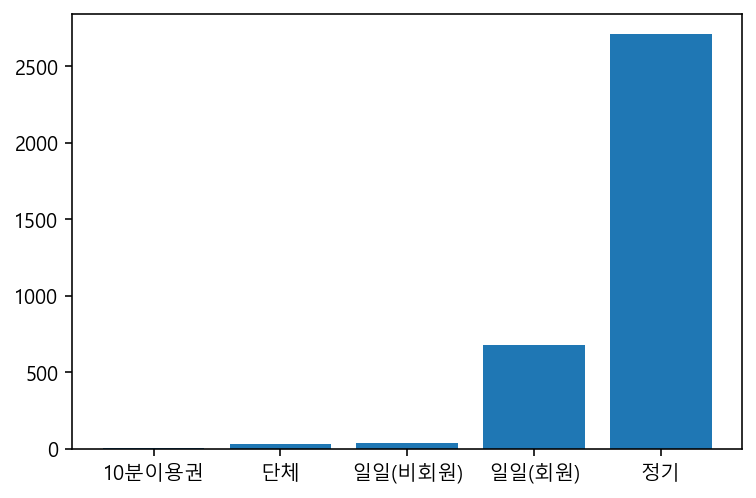

In [86]:
# 대여구분별 이용건수

plt.bar(tmp0['대여구분'],tmp0['이용건수']/1000)
plt.show()


# 시각화



**2) 대여소별 이용 건수 TOP 10**

- 대여소별 이용 건수 TOP 10을 막대 그래프로 시각화해 확인합니다.

In [36]:
tmp = bike.copy()
tmp.sort_values(by='이용건수', ascending=False, inplace=True)
tmp = tmp.head(10)
print(tmp)

                           대여소    대여구분 성별  연령대  이용건수        운동량      탄소량  \
17904       502. 뚝섬유원지역 1번출구 앞  일일(회원)  X  20대  1617  227070.15  2115.66   
90831        2715.마곡나루역 2번 출구       정기  X  20대  1566   58848.80   536.91   
4894         207. 여의나루역 1번출구 앞  일일(회원)  X  20대  1562  251219.34  2376.18   
73920            2102. 봉림교 교통섬      정기  X  20대  1427  153759.88  1376.01   
17932       502. 뚝섬유원지역 1번출구 앞      정기  X  20대  1326  138754.97  1255.80   
49444      1308. 안암로터리 버스정류장 앞      정기  X  20대  1230   68287.43   606.04   
43062        1160. 양천향교역 7번출구앞      정기  X  20대  1201   56636.99   518.23   
42770  1153. 발산역 1번, 9번 인근 대여소      정기  X  20대  1185   50909.32   462.87   
45430  1210. 롯데월드타워(잠실역2번출구 쪽)      정기  X  20대  1133   66216.35   614.26   
42699             1152. 마곡역교차로      정기  X  20대  1100   33891.65   310.87   

              이동거리   이용시간  
17904   9120082.48  75174  
90831   2316108.42  19566  
4894   10242192.30  87111  
73920   5931408.70  40412  
17932   5413160.62  403

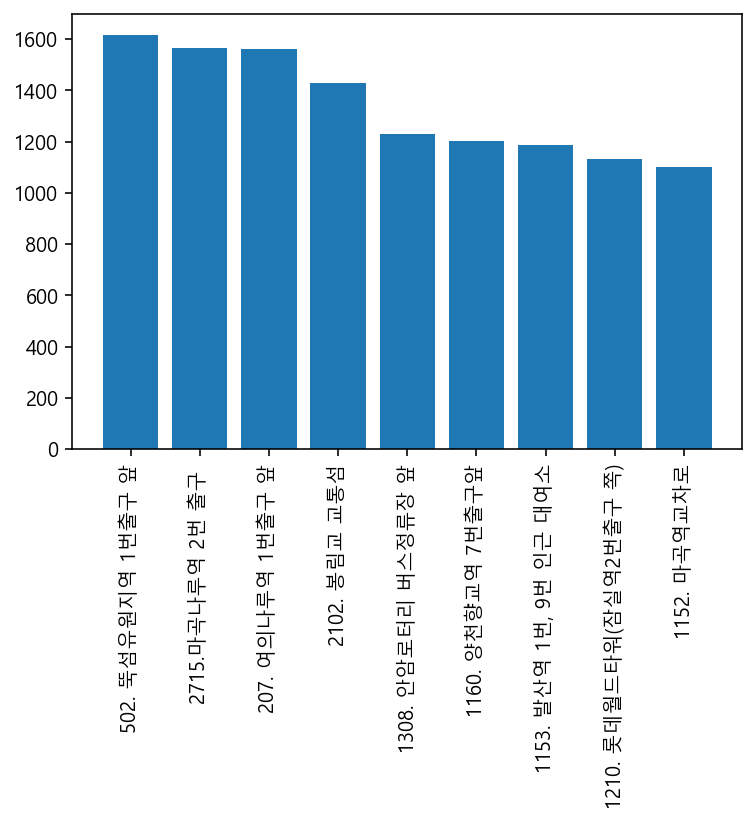

In [87]:
# 대여소별 이용건수 TOP 10

plt.bar(tmp['대여소'],tmp['이용건수'])
plt.xticks(rotation=90)
plt.show()

# 시각화





**3) (옵션) 연령대별 이용 건수**

- 연령대별 이용 건수를 막대 그래프로 시각화해 확인합니다.

In [46]:
tmp2 = bike.copy()
tmp2 = tmp2.groupby('연령대',as_index=False)[['이용건수']].sum()
print(tmp2)

   연령대     이용건수
0  10대   146596
1  20대  1281462
2  30대   747214
3  40대   443284
4  50대   269400
5  60대    71005
6  70대    10118
7  80대   491152


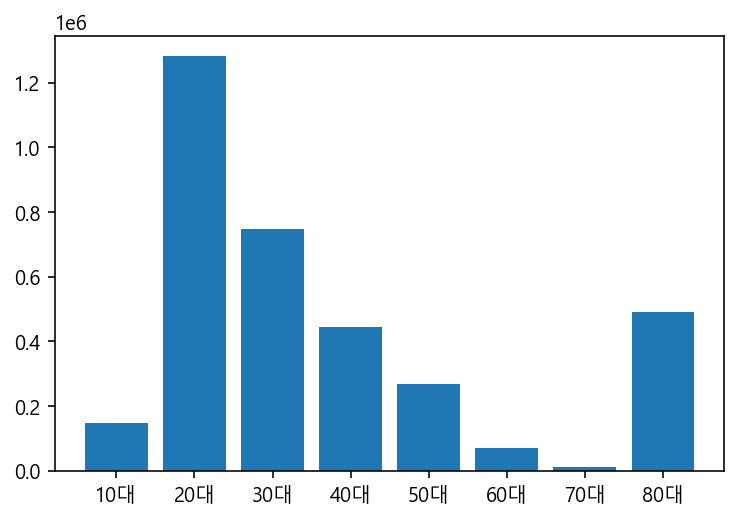

In [108]:
# 연령대별 이용건수

plt.bar(tmp2['연령대'],tmp2['이용건수'])
plt.show()

# 시각화




**4) (옵션) 성별별 이용 건수**

- 성별별 이용 건수를 막대 그래프로 시각화해 확인합니다.

In [48]:
tmp3 = bike.copy()
tmp3 = tmp3.groupby('성별',as_index=False)[['이용건수']].sum()
print(tmp3)

  성별     이용건수
0  F   828996
1  M  1200235
2  X  1431000


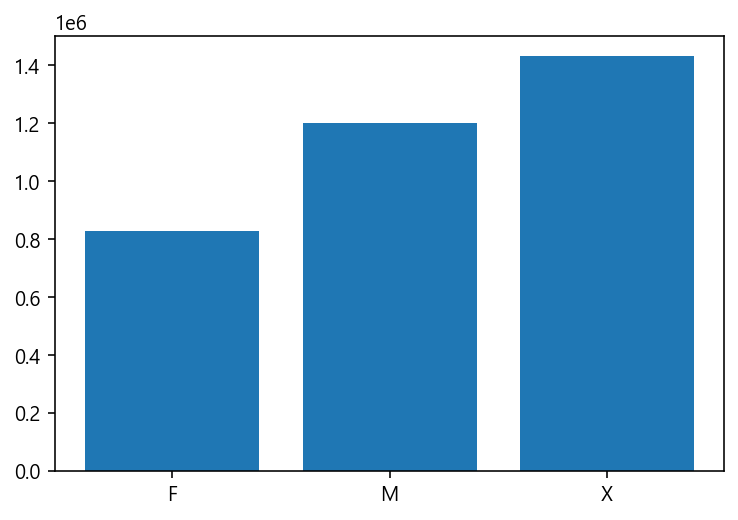

In [49]:
# 성별별 이용건수

plt.bar(tmp3['성별'],tmp3['이용건수'])
plt.show()
# 시각화





## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.


**1) 의견**

-  의외로 어르신들이 자전거를 많이 타신다.
-  정기권 이용자가 많다.
-  
-  
-  

**2) 기타**

- 데이터를 많이 다루니까 슬슬 머리가 아파옵니다 ㅋㅋ
- 
- 
- 
- 